In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataframe= pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [4]:
dataframe.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
dataframe.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


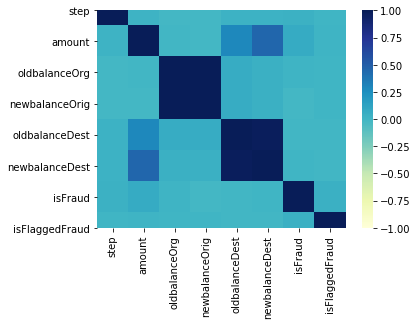

In [6]:
%matplotlib inline
corr=dataframe.corr()
ax=sns.heatmap(corr, vmin=-1, vmax=1, center=0,
               square=True, cmap='YlGnBu')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
dataframe.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Removing columns that are Strings as they wont have any impact on the predicitions

In [9]:
del dataframe['nameDest']
del dataframe['nameOrig']
del dataframe['isFlaggedFraud']

In [10]:
dataframe1=dataframe[0:-1]
dataframe1.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0


Counting number of Frauds(1) and Not Frauds in our data(0)

In [11]:
cnt0=(dataframe['isFraud']==0).sum()
cnt1=(dataframe['isFraud']==1).sum()

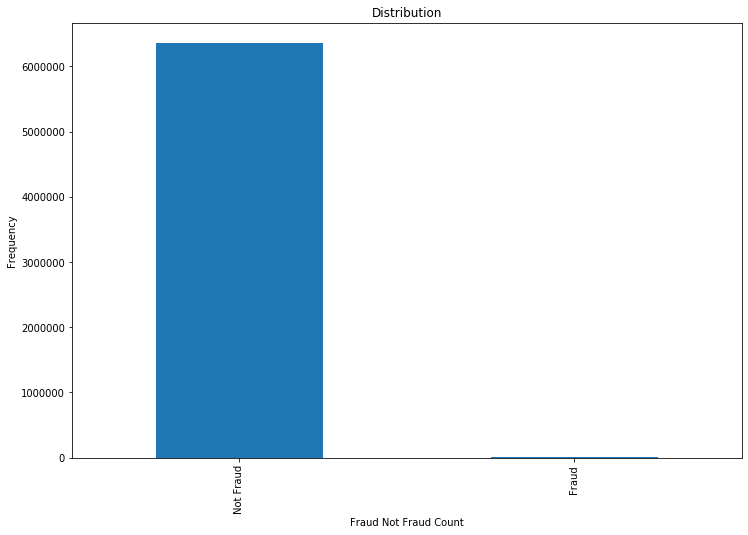

In [12]:
somelist=[cnt0,cnt1]
freq_series = pd.Series(somelist)
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
name=['Not Fraud', 'Fraud']
ax.set_title('Distribution')
ax.set_xlabel('Fraud Not Fraud Count')
ax.set_ylabel('Frequency')
ax.set_xticklabels(name)
plt.show()

In above value we Fraud is not even visible due to less Data of fraud. Let's undersample Not Fraud

In [13]:
le=preprocessing.LabelEncoder()
dataframe1['type2']=le.fit_transform(dataframe1['type'])
del dataframe1['type']
shuffled_df=dataframe1.sample(frac=1,random_state=4)
fraud_df=shuffled_df.loc[shuffled_df['isFraud']==1]
non_fraud_df=shuffled_df.loc[shuffled_df['isFraud']==0].sample(8212,random_state=4)
normalized=pd.concat([fraud_df,non_fraud_df])

In [14]:
cnt2=(normalized['isFraud']==0).sum()
cnt3=(normalized['isFraud']==1).sum()

After Undersmapling Not Fraud Data

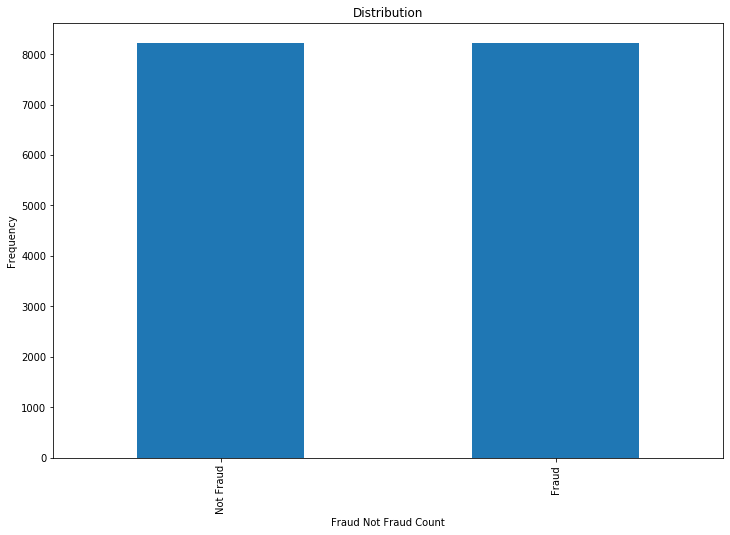

In [15]:
somelist1=[cnt2,cnt3]
freq_series1 = pd.Series.from_array(somelist1)
plt.figure(figsize=(12, 8))
ax = freq_series1.plot(kind='bar')
name=['Not Fraud', 'Fraud']
ax.set_title('Distribution')
ax.set_xlabel('Fraud Not Fraud Count')
ax.set_ylabel('Frequency')
ax.set_xticklabels(name)
plt.show()

We have a lot of Predictions of Fraud and Not Fraud classes occuring together. So, we shuffle it and then scale the values using Standard Scaler so that the data is normalized and our Models doesn't bias towards any one column. Since, Columns like amount have higher values. Hence, it will impact Predictions highly. We also use oneHotEncoder on Target to divide it into classes of 0( Not Fraud) and 1( Fraud)

In [16]:
normalized1=normalized.sample(frac=1, random_state=4)
X=normalized1.drop(['isFraud'], axis=1)
Y=normalized1['isFraud']
y3=Y.values.reshape(-1,1)
st_sc = StandardScaler()
X = st_sc.fit_transform(X)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
Y1=ohe.fit_transform(y3).toarray()
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,Y1, test_size=0.2, random_state=1)

Now that our Testing and Training Data is ready. Let's review it once before Training the models

In [17]:
x_train[0:5]

array([[ 0.61732638, -0.3831992 , -0.34744438, -0.20446412, -0.24197377,
        -0.32479785,  1.2753788 ],
       [ 0.21421155, -0.28253348, -0.2880506 , -0.20446412, -0.24197377,
        -0.32479785,  1.2753788 ],
       [ 0.47778663, -0.43166064, -0.37840515, -0.20446412, -0.24197377,
        -0.32479785,  0.59818944],
       [-1.09849571, -0.24461714, -0.26567957, -0.20446412, -0.24197377,
        -0.32479785,  1.2753788 ],
       [ 0.12118505, -0.42349384, -0.37840515, -0.20446412, -0.24197377,
        -0.32479785,  0.59818944]])

In [18]:
y_train[0:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Creating a Deep Learning Model using Keras

In [19]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.models import load_model
model = Sequential()
model.add(Dense(units = 64, input_dim = 7, activation = "relu"))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 2, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Using TensorFlow backend.
W0412 23:08:35.958184 13328 deprecation_wrapper.py:119] From c:\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0412 23:08:35.992205 13328 deprecation_wrapper.py:119] From c:\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0412 23:08:36.028145 13328 deprecation_wrapper.py:119] From c:\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0412 23:08:36.074983 13328 deprecation_wrapper.py:119] From c:\python\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0412 23:08:36.083001 13328 deprecation.py:506] From c:\python\lib\site-packages

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 13,282
Trainable params: 13,282
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=1)

Epoch 1/10
13139/13139 [==============================] - 3s 264us/step - loss: 0.4444 - acc: 0.8009
Epoch 2/10
13139/13139 [==============================] - 0s 33us/step - loss: 0.2237 - acc: 0.9057
Epoch 3/10
13139/13139 [==============================] - 0s 33us/step - loss: 0.1825 - acc: 0.9229
Epoch 4/10
13139/13139 [==============================] - 0s 33us/step - loss: 0.1553 - acc: 0.9387
Epoch 5/10
13139/13139 [==============================] - 0s 33us/step - loss: 0.1426 - acc: 0.9418
Epoch 6/10
13139/13139 [==============================] - 0s 33us/step - loss: 0.1363 - acc: 0.9462
Epoch 7/10
13139/13139 [==============================] - 0s 35us/step - loss: 0.1157 - acc: 0.9548
Epoch 8/10
13139/13139 [==============================] - 0s 33us/step - loss: 0.1060 - acc: 0.9594
Epoch 9/10
13139/13139 [==============================] - 0s 32us/step - loss: 0.1125 - acc: 0.9567
Epoch 10/10
13139/13139 [==============================] - 0s 33us/step - loss: 0.1140 - acc: 0.952

In [21]:
model.save("ccraud.hdf5")

In [23]:
score = model.evaluate(x_test, y_test)
print(score[1])

3285/3285 [==============================] - 0s 37us/step
0.9592085235920852


In [24]:
scoring=model.predict(x_test)
classes=model.predict_classes(x_test)
classes.reshape(1,-1)

array([[1, 0, 1, ..., 1, 1, 1]], dtype=int64)

In [26]:
loaded_m=load_model('ccfraud.hdf5')
somepredictions=loaded_m.predict(x_test)
accdl=metrics.accuracy_score(y_test.argmax(axis=1), somepredictions.argmax(axis=1))
accdl=accdl*100

Confusion Matrix:

In [27]:
print(pd.DataFrame(
    confusion_matrix(y_test.argmax(axis=1), somepredictions.argmax(axis=1)),
    columns=['Predicted Not fraud', 'Predicted fraud'],
    index=['True not fraud', 'True fraud']
))

                Predicted Not fraud  Predicted fraud
True not fraud                 1596               93
True fraud                       60             1536


KNN Using Sklearn
1) Finding out at which K Value does KNN Algorithm does the best work for us:

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test, y_pred)
    scores_list.append(scores[k])

Text(0, 0.5, 'testing accuracy')

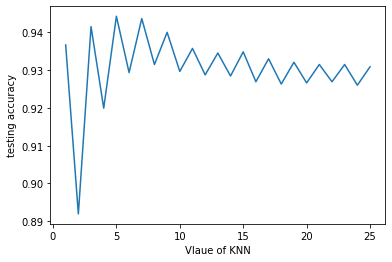

In [29]:
plt.plot(k_range, scores_list)
plt.xlabel("Vlaue of KNN")
plt.ylabel("testing accuracy")

In [33]:
scores_list.index(max(scores_list))

4

Since KNN performs best for value 4. We'll use value of K as 4 for our dataset

In [35]:
knn1=KNeighborsClassifier(n_neighbors=4)
knn1.fit(x_train, y_train)
y_prediction2=knn1.predict(x_test)
accknn=metrics.accuracy_score(y_test, y_prediction2)
accknn=accknn*100

Plotting Confusion Matrix for KNN

In [36]:
print(pd.DataFrame(
    confusion_matrix(y_test.argmax(axis=1), y_prediction2.argmax(axis=1)),
    columns=['Predicted Not fraud', 'Predicted fraud'],
    index=['True not fraud', 'True fraud']
))

                Predicted Not fraud  Predicted fraud
True not fraud                 1645               44
True fraud                      138             1458


Decision Trees using Sklearn

In [37]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score
accdt=accuracy_score(y_test, y_predict)
accdt=accdt*100

Plotting Confusion Matrix for Decision Tree

In [38]:
print(pd.DataFrame(
    confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1)),
    columns=['Predicted Not fraud', 'Predicted fraud'],
    index=['True not fraud', 'True fraud']
))

                Predicted Not fraud  Predicted fraud
True not fraud                 1674               15
True fraud                       15             1581


Comparing the 3 different classifiers:

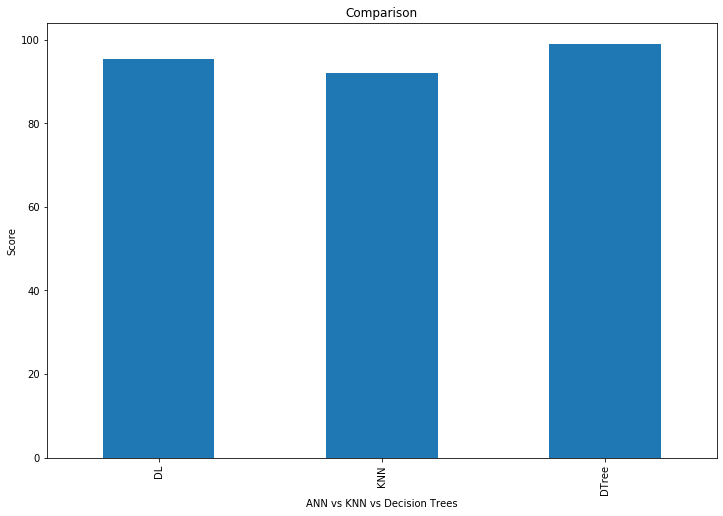

In [39]:
acc_list=[accdl,accknn,accdt]
ac_score1 = pd.Series.from_array(acc_list)
plt.figure(figsize=(12, 8))
ax = ac_score1.plot(kind='bar')
name=['DL', 'KNN', 'DTree']
ax.set_title('Comparison')
ax.set_xlabel('ANN vs KNN vs Decision Trees')
ax.set_ylabel('Score')
ax.set_xticklabels(name)
plt.show()

In [43]:
print("Accuracy of ANN:", accdl, "\nAccuracy of KNN Classifier is:", accknn, "\nAccuracy of Decision Tree Classifier is:", accdt)

Accuracy of ANN: 95.34246575342465 
Accuracy of KNN Classifier is: 91.99391171993912 
Accuracy of Decision Tree Classifier is: 99.08675799086758


Conclusion: Decision Tree performs best on our dataset followed by ANN and then KNN.